In [22]:
import pathlib
from torchvision import datasets, transforms
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from tqdm import tqdm


In [3]:
ROOT = pathlib.Path().resolve()

IMAGE_DIR = ROOT / "data" / "archive" / "food-101" / "food-101" / "images"

if not IMAGE_DIR.exists():
    raise FileNotFoundError(f"Missing dataset folder:\n{IMAGE_DIR}")

# Safety: avoid __MACOSX folders
bad_paths = list((ROOT / "data" / "archive" / "food-101").rglob("__MACOSX"))
if bad_paths:
    print("⚠ WARNING: __MACOSX folders detected.")

print("Dataset path OK.")

⚠ WARNING: __MACOSX folders detected.
Dataset path OK.


In [17]:

eda_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

eda_dataset = datasets.ImageFolder(IMAGE_DIR, transform=eda_transform)
class_names = eda_dataset.classes
num_classes = len(class_names)

print("Number of classes:", num_classes)
print("Total images:", len(eda_dataset))
class_counts = Counter([label for _, label in eda_dataset.imgs])
print("Images per class (sample):", dict(list(class_counts.items())[:5]))

Number of classes: 101
Total images: 101000
Images per class (sample): {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000}


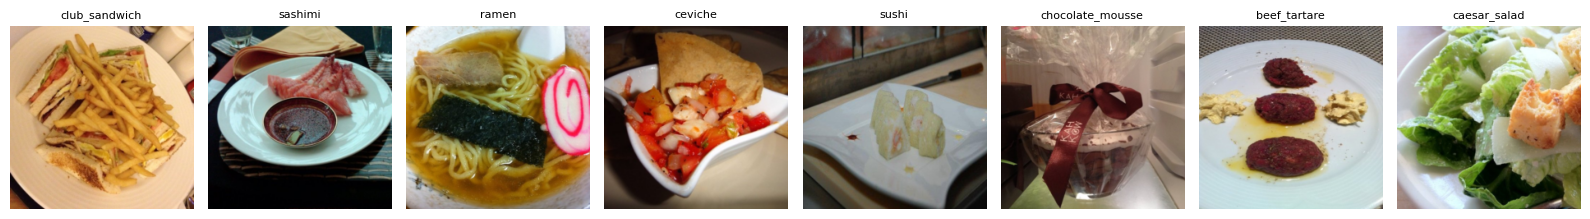

In [15]:
def show_samples(dataset, n=8):
    idxs = random.sample(range(len(dataset)), n)
    plt.figure(figsize=(16, 4))
    for i, idx in enumerate(idxs):
        img, label = dataset[idx]
        plt.subplot(1, n, i+1)
        plt.imshow(img.permute(1, 2, 0))
        plt.title(class_names[label], fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(eda_dataset, n=8)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)
print("Variance explained:", pca.explained_variance_ratio_)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(emb_2d[:,0], emb_2d[:,1], c=labels, cmap='tab20', s=10)
plt.colorbar(scatter)
plt.title("PCA of EfficientNet-B0 Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
